In [16]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv
import string

In [17]:

#df = pd.read_csv('Dataset\Tweets.csv', encoding='latin-1')
df = pd.read_pickle("Dataset/Tweets.pkl")

In [18]:
df=df.astype(str)

In [19]:
df

,Tweets,Emotion,Writer
0,iâm proud to endorse this diverse and hopefu...,Positive,BarackObama
1,welcome home astrobehnken and astrodoug we lau...,Positive,BarackObama
2,this pandemic is far from overââand our me...,Trust,BarackObama
3,john believed that in all of us there exists t...,Positive,BarackObama
4,john spent his entire life fighting for justic...,Neagtive,BarackObama
...,...,...,...
12104,for a minute there i was all happy thinking it...,Anticipation,Random
12105,for the first time ever my iphone crashed itun...,Neagtive,Random
12106,for trish sa right side ng reply ko may star a...,Positive,Random
12107,forgot about them science exams tbh n,Neutral,Random


In [20]:
data=df

In [21]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords

In [22]:
def clean_data(data):
    data.replace('',np.nan,inplace=True)
    data.dropna(axis=0, how='any', inplace=True)
    
    return data

In [23]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming 
         #stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [24]:
    data = clean_data(data)

In [25]:
X= df[['Tweets', 'Emotion']].agg('-'.join, axis=1)
y=data['Writer']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)
 

In [27]:
def modelEvaluation(predictions, y_test_set):
    return float(format(accuracy_score(y_test_set, predictions)))*100
    
    

In [28]:
#Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
  


In [29]:
    x_train_cleaned = []
    x_test_cleaned = []

    for d in x_train:
        x_train_cleaned.append(cleanText(d))

    for d in x_test:
        x_test_cleaned.append(cleanText(d))

In [30]:
    x_train_input = tfidf.transform(x_train_cleaned)
    

In [31]:
    '''
    svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
    svr_lin.fit(x_train_input, y_train)
    y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))
    
    '''

"\nsvr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)\nsvr_lin.fit(x_train_input, y_train)\ny_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))\n\n"

In [32]:
    countVect = CountVectorizer() 
    x_train_countVect = countVect.fit_transform(x_train_cleaned)
    

In [33]:
    decTree = DecisionTreeClassifier()
    decTree.fit(x_train_input, y_train)
    y_decTree_predicted = decTree.predict(tfidf.transform(x_test_cleaned))

In [34]:
res=modelEvaluation(y_decTree_predicted, y_test)
Accuracy=float(res)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_decTree_predicted, y_test))

                precision    recall  f1-score   support

   BarackObama       0.56      0.61      0.59       184
     BillGates       0.55      0.48      0.51       226
  BorisJohnson       0.70      0.70      0.70       190
HillaryClinton       0.42      0.47      0.45       192
  JeremyCorbyn       0.58      0.61      0.59       195
        Random       0.67      0.62      0.64       224

      accuracy                           0.58      1211
     macro avg       0.58      0.58      0.58      1211
  weighted avg       0.58      0.58      0.58      1211



In [36]:
from sklearn.metrics import precision_score
precision=precision_score( y_decTree_predicted,y_test, 
                                           pos_label='Positive',
                                           average='macro')

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [37]:
print(precision)

0.580018180809679


In [38]:
from sklearn.metrics import recall_score

recall=recall_score( y_decTree_predicted,y_test, 
                                           pos_label='positive',
                                           average='macro')
print(recall)

0.5803260291128222


C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [39]:
accuracy=Accuracy/100

In [40]:
print(accuracy)

0.5780346820809249


In [41]:
dict = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall
}

In [42]:
import pickle
file = open('Accuracies/DT', 'wb')
pickle.dump(dict, file)
file.close()

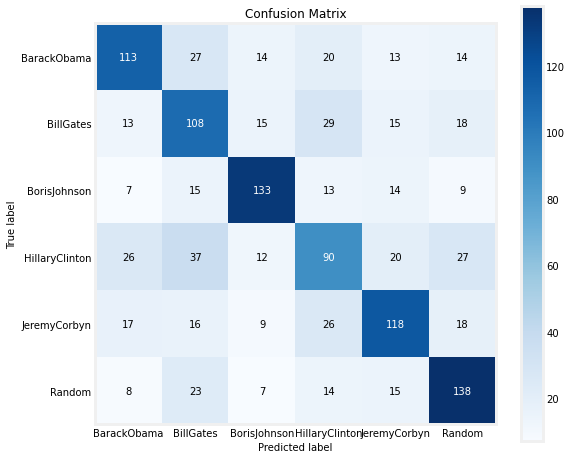

In [43]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_decTree_predicted,
    figsize=(8,8))